<a href="https://colab.research.google.com/github/Rehman047/Quran-Tilawat-Multi_Class_Classification_Deep_Learning/blob/main/Quran_Tilawat_Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mohammedalrajeh/quran-recitations-for-audio-classification")

Skipping, found downloaded files in "./quran-recitations-for-audio-classification" (use force=True to force download)


In [ ]:
import torch
from torch import nn
from torch.optim import SGD
import librosa
from torch.utils.data import Dataset,DataLoader
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.transform import resize

device="cuda" if torch.cuda.is_available else 'cpu'

In [ ]:
# /content/quran-recitations-for-audio-classification/Dataset/Dataset/AbdulBari_Althubaity/abdulbari_001.wav

In [ ]:
df=pd.read_csv("/content/quran-recitations-for-audio-classification/files_paths.csv")

In [ ]:
df.head().iloc[0,0]

'./Dataset/Mohammed_Aluhaidan/lohaidan_171.wav'

In [ ]:
df['FilePath']='/content/quran-recitations-for-audio-classification/Dataset'+df['FilePath'].str[1:]

In [ ]:
df.head()

,FilePath,Class
0,/content/quran-recitations-for-audio-classific...,Mohammed_Aluhaidan
1,/content/quran-recitations-for-audio-classific...,Mohammed_Aluhaidan
2,/content/quran-recitations-for-audio-classific...,Mohammed_Aluhaidan
3,/content/quran-recitations-for-audio-classific...,Mohammed_Aluhaidan
4,/content/quran-recitations-for-audio-classific...,Mohammed_Aluhaidan


In [ ]:
len(df['Class'].unique())

12

In [ ]:
df['Class'].unique()

array(['Mohammed_Aluhaidan', 'Yasser_Aldossary', 'Maher_Almuaiqly',
       'Nasser_Alqutami', 'AbdulBari_Althubaity', 'Bander_Balilah',
       'Ali_Alhothaify', 'Saud_Alshuraim', 'Mohammed_Ayoub',
       'AbdulRahman_Alsudais', 'Saad_Alghamdi', 'Abdullah_Albuaijan'],
      dtype=object)

In [ ]:
df.shape

(6687, 2)

In [ ]:
df['Class'].value_counts()

,count
Class,
Saud_Alshuraim,696
Saad_Alghamdi,688
AbdulRahman_Alsudais,648
Yasser_Aldossary,576
Ali_Alhothaify,576
Bander_Balilah,576
Maher_Almuaiqly,576
Abdullah_Albuaijan,504
Mohammed_Ayoub,480


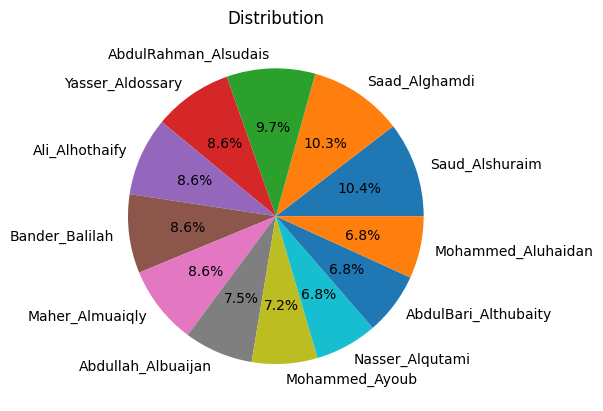

In [ ]:
plt.pie(df['Class'].value_counts(),labels=df['Class'].value_counts().index,autopct="%1.1f%%")
plt.title("Distribution")
plt.show()

In [ ]:
train.head()

,FilePath,Class
247,/content/quran-recitations-for-audio-classific...,Mohammed_Aluhaidan
2463,/content/quran-recitations-for-audio-classific...,AbdulBari_Althubaity
6080,/content/quran-recitations-for-audio-classific...,Saad_Alghamdi
5117,/content/quran-recitations-for-audio-classific...,AbdulRahman_Alsudais
2669,/content/quran-recitations-for-audio-classific...,Bander_Balilah


In [ ]:
encoder=LabelEncoder()
df['Class']=encoder.fit_transform(df['Class'])
df['Class']

LabelEncoder()

In [ ]:
train=df.sample(frac=0.72,random_state=42)
test=df.drop(index=train.index)

val=test.sample(frac=0.38,random_state=42)
test=test.drop(index=val.index)

print("Train Shape, ", train.shape)
print("Test Shape, ", test.shape)
print("Val Shape, ", val.shape)

In [ ]:
class MyDataset(Dataset):
  def __init__(self,data):
    self.data=data
    self.labels=torch.Tensor(data["Class"],dtype=torch.long).to(device)
    self.audios=[torch.tensor(self.get_spectogram(path),dtype=torch.float) for path in df['FilePath']]
  def __len__(self):
    return self.data.shape[0]
  def __getitem__(self,index):
     audio=self.audios[index].unsqueeze(0).to(device)
     label=self.labels[index].to(device)
     return audio,label
  def get_spectogram(self,path):
    sr=22050
    duration=5
    img_height=128
    img_width=256
    signal,sr=librosa.load(path,sr=sr,duration=duration)
    spec=librosa.feature.melspectrogram(y=signal,sr=sr,n_fft=2048,hop_length=512,n_mels=128)
    spec_db=librosa.power_to_db(spec,ref=np.max)

    spec=librosa.utils.fix_length(spec_db,size=(duration*sr)//513)
    spec=resize(spec,(image_height,image_width),anti_aliasig=True)
    return spec

